<h1>Classification of SVHN using CNN</h1>

The Street View House Numbers (SVHN) Dataset 
SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. 
 
Link to the dataset: https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing 
 
Project Objectives
Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages

Data fetching and understand the train/test splits.

Implement and apply a deep neural network classifier including

Implement batch normalization for training the neural network

Print the classification accuracy metrics (10 points)  
 


# Importing Keras Modules


In [0]:
##Lets install tensorflow 2.x if running on colab
#!pip install tensorflow==2.1

In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.0.0'

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')


# Loading the Dataset

<h3>Load SVHN dataset from a h5 file</h3>

In [0]:
import h5py
import numpy as np

# Open the file as readonly. Using local copy for now
#h5f = h5py.File('/content/drive/My Drive/GL_Colab/Projects//NN/SVHN_single_grey1.h5', 'r')
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

#Store the labels for use later in classification metrics
y_test_class = y_test

In [0]:
#Get the size of dataset
print("Total train dataset size",x_train.shape[0])
print("Total test dataset size",x_test.shape[0])

Total train dataset size 42000
Total test dataset size 18000


In [0]:
#Dimension of the input images
print("Dimension of the input",x_train.shape[1:])

Dimension of the input (32, 32)


In [0]:
#Label dimension and num of classes
print("Dimension of label",y_train.shape)
print("classes",np.unique(y_train))

num_classes = len(np.unique(y_train))

Dimension of label (42000,)
classes [0 1 2 3 4 5 6 7 8 9]


In [0]:
num_classes

10

<h4>Visualizing the dataset</h4>

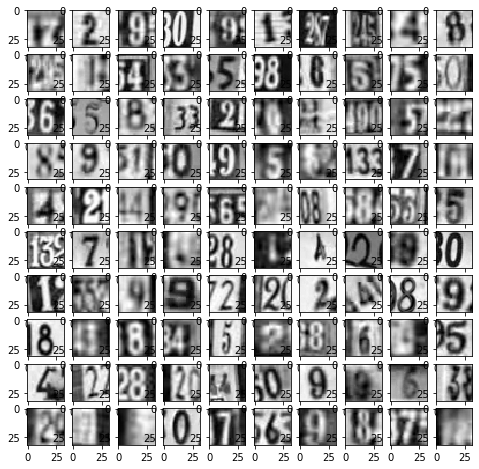

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [0]:
print(x_train.dtype)

float32


In [0]:
print(y_train.dtype)

uint8


In [0]:
#Sanity
print("train shape",x_train.shape)
print("test shape",x_test.shape)

train shape (42000, 32, 32)
test shape (18000, 32, 32)


<h3>Pre-processing the dataset</h3>


#### Reshape to feed into a DNN dense layer

In [0]:
#Reshaping to feed into DNN
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [0]:
#Sanity
print("train shape",x_train.shape)
print("test shape",x_test.shape)

train shape (42000, 1024)
test shape (18000, 1024)


<h4>Normalizing the input</h4>

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (42000, 1024)
42000 train samples
18000 test samples


In [0]:
#Sanity
x_train[1]

array([0.34101608, 0.3414451 , 0.34656274, ..., 0.29498273, 0.30054745,
       0.31092745], dtype=float32)

### Import the necessary layers from keras to build the model

In [0]:
#Import the required keras modules
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Nadam, SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

<h4>Convert Labels from digits to one hot vectors</h4>

In [0]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
print(y_train[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


#### First Plain Model with no regularization or tuning

In [0]:
#Initialize the sequential model
model = Sequential()

#Add to the first Dense layer with 1024 neurons and relu as activation function
model.add(Dense(1024,activation="relu",input_shape=(1024,),name="dense_1"))

#Add to the first Dense layer with 1024 neurons and relu as activation function
model.add(Dense(1024,activation="relu",name="dense_2"))

#Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
model.add(Dense(10,activation="softmax",name="dense_f"))

In [0]:
#Check the model summary to see if the model architecture is correct and check parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_f (Dense)              (None, 10)                10250     
Total params: 2,109,450
Trainable params: 2,109,450
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Compile the model with adam optimizer and categorical_cross entropy as the loss function and metrics as accuracy
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Lets define the early stopping with patience as 10
early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1)
callback_list = [early_stopping]

In [0]:
#Train the model 
BATCH_SIZE = 128
EPOCHS = 50

history = model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_split=0.15)

Train on 35700 samples, validate on 6300 samples
Epoch 1/50
35700/35700 [==============================] - 11s 298us/sample - loss: 2.0935 - accuracy: 0.2307 - val_loss: 1.6862 - val_accuracy: 0.4233
Epoch 2/50
35700/35700 [==============================] - 9s 256us/sample - loss: 1.5124 - accuracy: 0.4879 - val_loss: 1.3533 - val_accuracy: 0.5589
Epoch 3/50
35700/35700 [==============================] - 9s 252us/sample - loss: 1.3005 - accuracy: 0.5741 - val_loss: 1.1930 - val_accuracy: 0.6267
Epoch 4/50
35700/35700 [==============================] - 9s 247us/sample - loss: 1.1863 - accuracy: 0.6182 - val_loss: 1.1575 - val_accuracy: 0.6263
Epoch 5/50
35700/35700 [==============================] - 9s 240us/sample - loss: 1.0978 - accuracy: 0.6517 - val_loss: 1.0700 - val_accuracy: 0.6638
Epoch 6/50
35700/35700 [==============================] - 9s 254us/sample - loss: 1.0388 - accuracy: 0.6720 - val_loss: 1.1218 - val_accuracy: 0.6424
Epoch 7/50
35700/35700 [==========================

In [0]:
#Get the accuracy from this model
model.evaluate(x_test,y_test,verbose=0)

#Accuracy is around 80

[0.7139661603503757, 0.79477775]

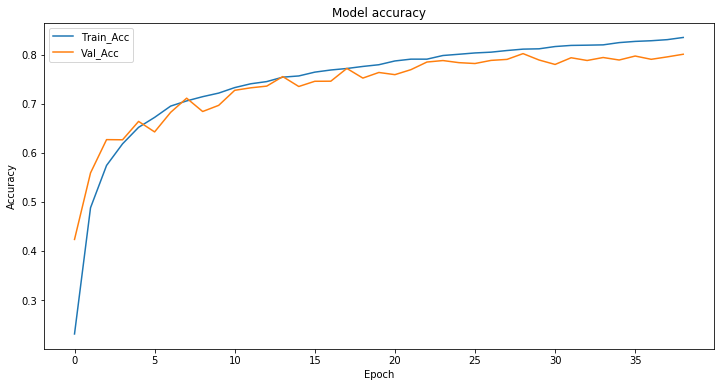

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

#We can see that the train and val accuracy are diverging. Validation accuracy is wavering and stagnant while
#training accuracy is increasing..
#There is some amount of overfitting
#We will need to check with addtional tuning

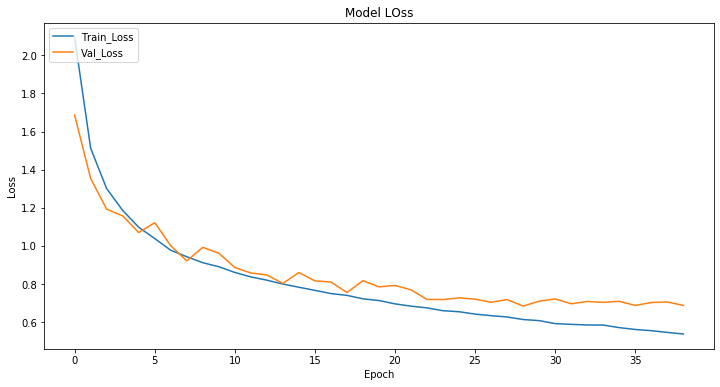

In [0]:
#Lets visualize the training and validation loss
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model LOss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_Loss","Val_Loss"], loc='upper left')

#As seen in accuracy plot, we can see similar observations in the loss as well

[0.42333335, 0.5588889, 0.62666667, 0.6263492, 0.66380954, 0.64238095, 0.68222225, 0.7111111, 0.68396825, 0.69650793, 0.7271429, 0.7322222, 0.73571426, 0.7550794, 0.7349206, 0.7455556, 0.7457143, 0.77174604, 0.7520635, 0.76349205, 0.7590476, 0.76920635, 0.7847619, 0.7877778, 0.7834921, 0.78174603, 0.78809524, 0.79015875, 0.80190474, 0.7888889, 0.77984124, 0.7934921, 0.7879365, 0.79396826, 0.7888889, 0.79698414, 0.7903175, 0.7952381, 0.8006349]
[0.2307283, 0.48787114, 0.57406163, 0.61815125, 0.65170866, 0.6719888, 0.694986, 0.7055462, 0.7142017, 0.7214846, 0.7326891, 0.7404482, 0.74492997, 0.7539496, 0.7564146, 0.7641737, 0.7685434, 0.7715966, 0.7757703, 0.7792717, 0.7869468, 0.7906442, 0.7906163, 0.7980672, 0.80061626, 0.8032773, 0.80487394, 0.8082353, 0.8110364, 0.8117087, 0.81633055, 0.8186275, 0.81910366, 0.8197479, 0.8243417, 0.8268067, 0.8281513, 0.83036417, 0.83481795]


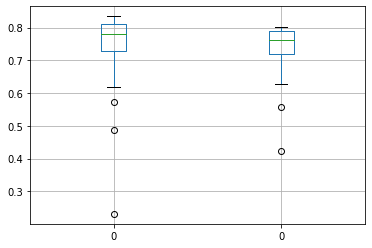

In [0]:
import pandas as pd
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

#We can see the score range variation explicitly

#### Adjust the # of layers

In [0]:
#Lets use some utility functions
#Copied over from example codes
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='relu', input_shape=(1024,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'relu'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=BATCH_SIZE, epochs=EPOCHS):
    model.summary()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.15, verbose=False)
    loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    print("Model accuracy : ", accuracy)
    print("Model Loss :", loss)
 
    plt.figure(figsize=(12,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 2,109,450
Trainable params: 2,109,450
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.8117778
Model Loss : 0.6813515035046471


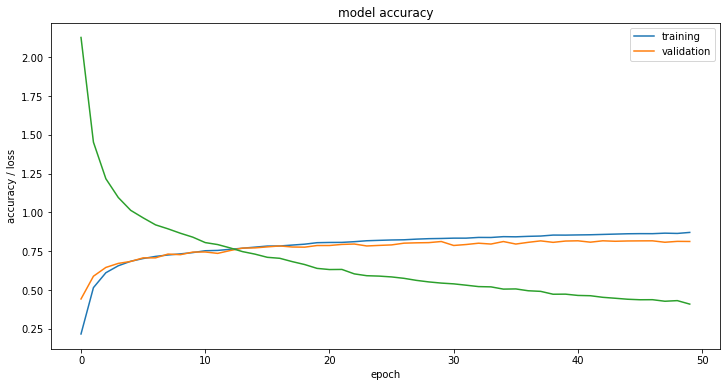

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total params: 3,159,050
Trainable params: 3,159,050
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.79661113
Model Loss : 1.1332287575668758


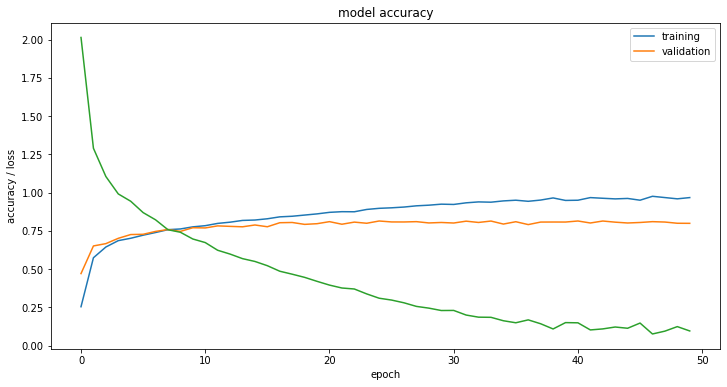

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10250     
Total params: 4,208,650
Trainable params: 4,208,650
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.78605556
Model Loss : 1.4021359120408694


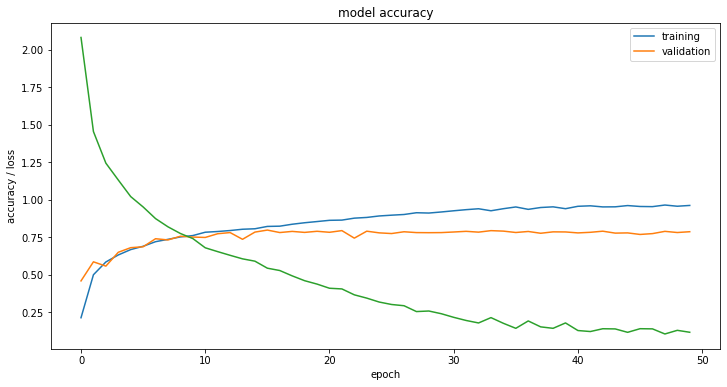

In [0]:
for layers in range(2,5):
    model = create_dense([1024] * layers)
    evaluate(model)

In [0]:
##Based on the above observations we can see that the accuracy is around 80% or less for all the three configurations
#We can see more overfitting tendency with more layers (possibly can be reduced by regularization)
#At this time we will stick with a total of 3 layers as the base model as there does not seem to be any additional
#benefit in terms of accuracy vs the increase in parameters and training cost

#### Lets check the number of neurons

In [0]:
#utility functions to evaluate the performance
def create_dense(no_of_neurons):
    model = Sequential()
    
    #Add to the first Dense layer with neurons and relu as activation function
    model.add(Dense(no_of_neurons,activation="relu",input_shape=(1024,),name="dense_1"))

    #Add to the first Dense layer with  neurons and relu as activation function
    model.add(Dense(no_of_neurons,activation="relu",name="dense_2"))

    #Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
    model.add(Dense(10,activation="softmax",name="dense_f"))
    
    return model

def evaluate(model, batch_size=BATCH_SIZE, epochs=EPOCHS):
    model.summary()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.15, verbose=False)
    loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    print("Model accuracy : ", accuracy)
    print("Model Loss :", loss)
 
    plt.figure(figsize=(12,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_f (Dense)              (None, 10)                10250     
Total params: 2,109,450
Trainable params: 2,109,450
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.8005555
Model Loss : 0.7569517571263843


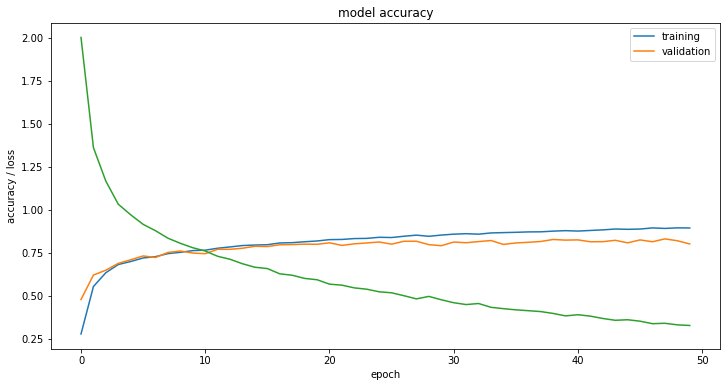

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.8236667
Model Loss : 0.6511864147053824


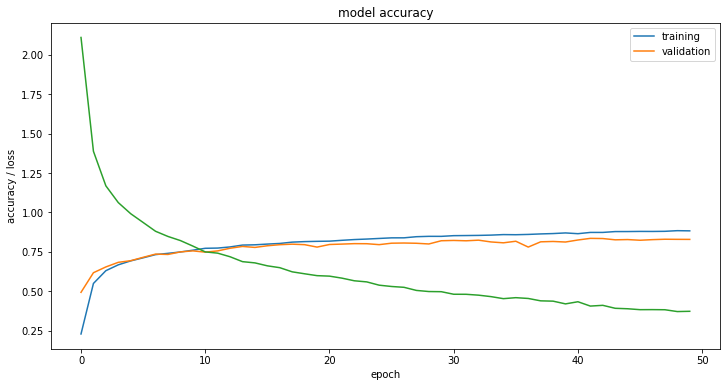

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_f (Dense)              (None, 10)                2570      
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.82244444
Model Loss : 0.6271724067264133


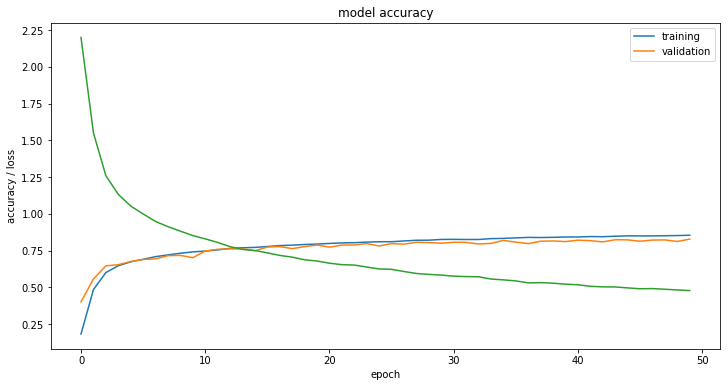

In [0]:
for neurons in [1024,512,256]:
    model = create_dense(neurons)
    evaluate(model)

In [0]:
#Looks like accuracy can be maintained even with less no of neurons per dense layer
#We can see that with 512 neurons we were able to stabilize the validation accuracy and is slightly closer to training
#With further reduction to 256 the accuracy slightly increases
#We will for now go with 512 neurons per Dense layer as it can be bit quicker than 256

### Lets check the impact of batch size of the above fixed model now

In [0]:
#Utility function to run multiple models
#utility function to evaluate the performance

def create_evaluate(batch_size=BATCH_SIZE, epochs=EPOCHS):
    
    #Initialize the base model
    model = Sequential()
    
    #Add to the first Dense layer with neurons and relu as activation function
    model.add(Dense(512,activation="relu",input_shape=(1024,),name="dense_1"))

    #Add to the first Dense layer with  neurons and relu as activation function
    model.add(Dense(512,activation="relu",name="dense_2"))

    #Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
    model.add(Dense(10,activation="softmax",name="dense_f"))
    
    print("Batch size",batch_size)
    model.summary()
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.15, verbose=False)
    
    loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    print("Model accuracy : ", accuracy)
    print("Model Loss :", loss)
 
    plt.figure(figsize=(12,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()


Batch size 256
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.83283335
Model Loss : 0.6241503659221861


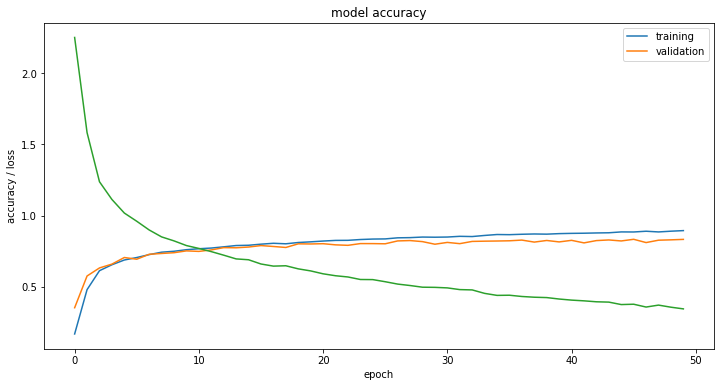

Batch size 128
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.8259444
Model Loss : 0.6420791741609574


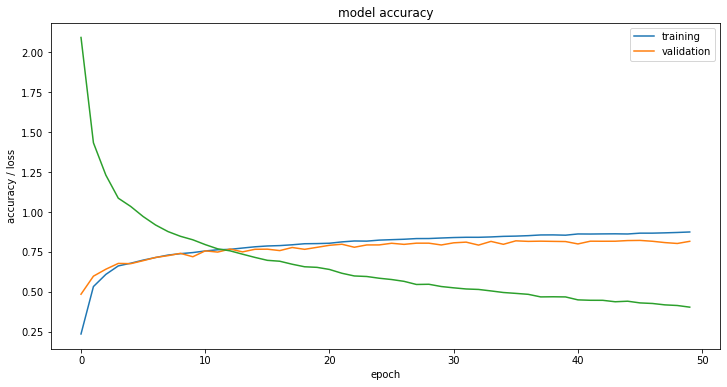

Batch size 64
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.6965
Model Loss : 0.9728617723782857


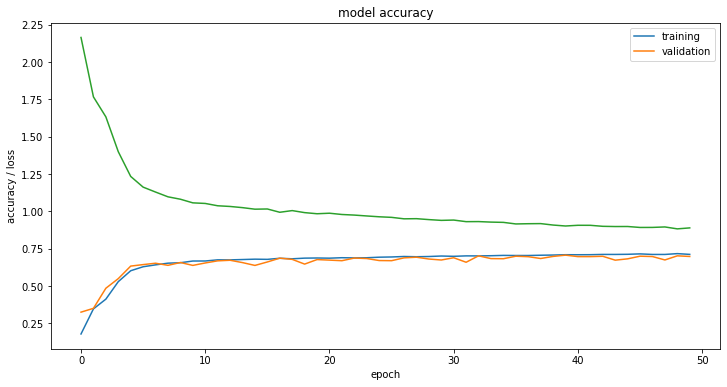

Batch size 32
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.54072225
Model Loss : 1.3764482806523641


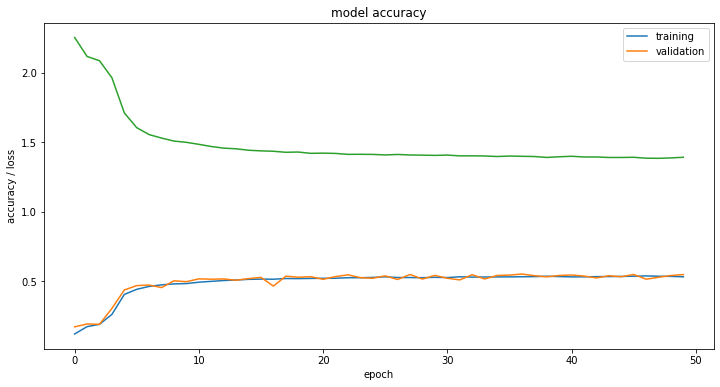

In [0]:
for bsize in [256,128,64,32]:
    create_evaluate(batch_size=bsize)

In [0]:
###We can see almost similar performances with batch size of 256 and 128 but still not completely devoid of overfitting
###Batch size of 64 and 32 the accuracy is terrible with 50 epochs but we can see the validation and training converging
#We will try batch size of 256 and 64 with more epochs and early stopping in place to see what is best
#Lets also add 512 to see if it improves

### Epochs

In [0]:
#Utility function run various models
def create_evaluate(batch_size=BATCH_SIZE, epochs=EPOCHS):
    
    #Initialize the base model
    model = Sequential()
    
    #Add to the first Dense layer with neurons and relu as activation function
    model.add(Dense(512,activation="relu",input_shape=(1024,),name="dense_1"))

    #Add to the first Dense layer with  neurons and relu as activation function
    model.add(Dense(512,activation="relu",name="dense_2"))

    #Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
    model.add(Dense(10,activation="softmax",name="dense_f"))
    
    print("Batch size",batch_size)
    model.summary()
    
    #Lets define the early stopping with patience as 10
    early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1)
    callback_list = [early_stopping]
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=callback_list, validation_split=.15, verbose=False)
    
    loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    print("Model accuracy : ", accuracy)
    print("Model Loss :", loss)
 
    plt.figure(figsize=(12,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()


Batch size 512
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Epoch 00046: early stopping
Model accuracy :  0.8267222
Model Loss : 0.6040505648056667


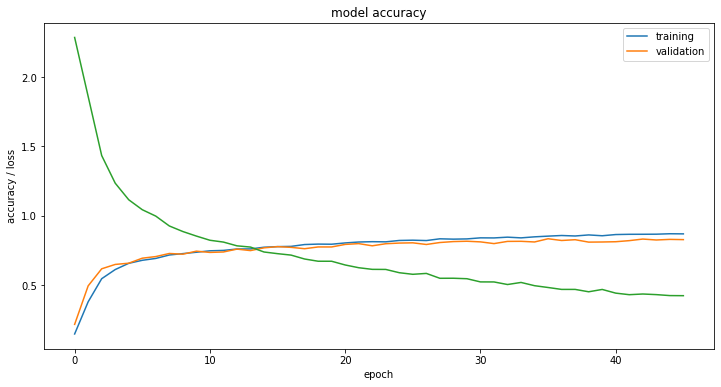

Batch size 256
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Epoch 00084: early stopping
Model accuracy :  0.8303889
Model Loss : 0.6871245916750696


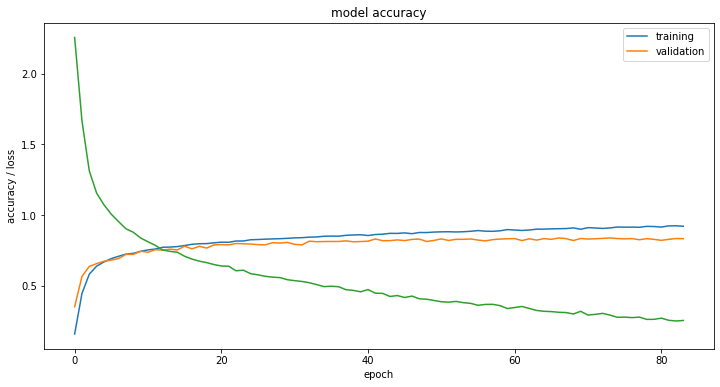

Batch size 64
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Epoch 00045: early stopping
Model accuracy :  0.7783333
Model Loss : 0.7669431890911527


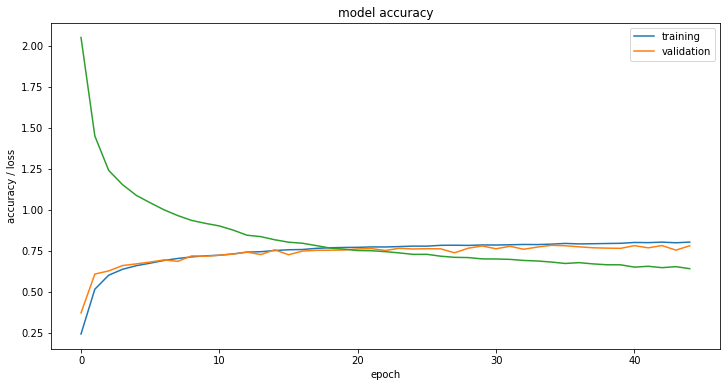

In [0]:
for bsize in [512,256,64]:
    create_evaluate(batch_size=bsize,epochs=100)

In [0]:
##Based on the above observations we will go with 100 epochs with batch size of 512 and early stopping
##Early stopping anyway ensures epochs are not contributing to overfitting

#### Lets try out few activation functions

In [0]:
#Utility function to run various models
def create_evaluate(activation_fn):
    
    #Initialize the base model
    model = Sequential()
    
    #Add to the first Dense layer with neurons and relu as activation function
    model.add(Dense(512,activation=activation_fn,input_shape=(1024,),name="dense_1"))

    #Add to the first Dense layer with  neurons and relu as activation function
    model.add(Dense(512,activation=activation_fn,name="dense_2"))

    #Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
    model.add(Dense(10,activation="softmax",name="dense_f"))
    
    print("Activation Function",activation_fn)
    model.summary()
    
    #Lets define the early stopping with patience as 10
    early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1)
    callback_list = [early_stopping]
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, batch_size=512, epochs=100, callbacks=callback_list, validation_split=.15, verbose=False)
    
    loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    print("Model accuracy : ", accuracy)
    print("Model Loss :", loss)
 
    plt.figure(figsize=(12,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()


Activation Function relu
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Epoch 00086: early stopping
Model accuracy :  0.8412778
Model Loss : 0.6124410391251246


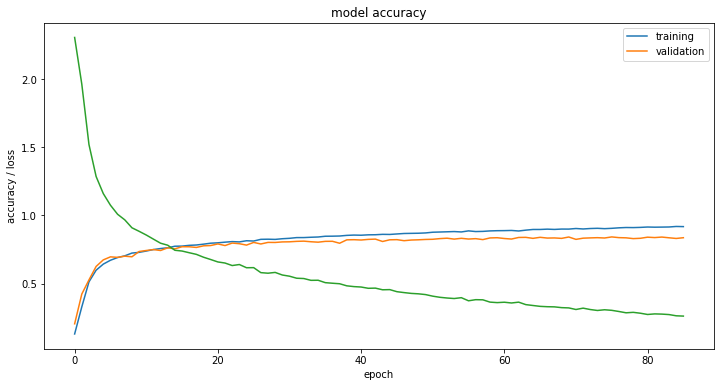

Activation Function elu
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Epoch 00057: early stopping
Model accuracy :  0.843
Model Loss : 0.6139660857518514


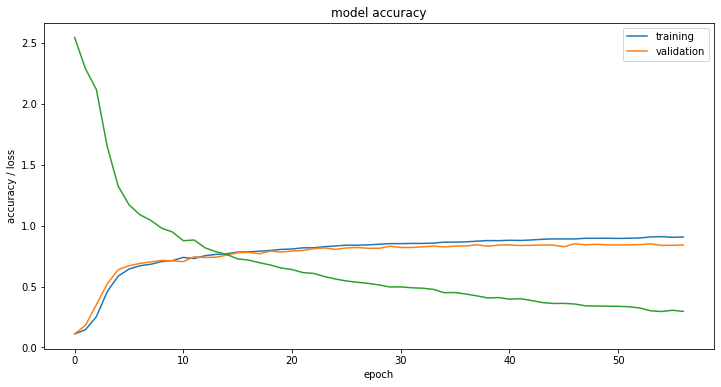

In [0]:
for fn in ["relu","elu"]:
    create_evaluate(activation_fn=fn)

In [0]:
##Looks like elu converged faster in this case even though not much difference. 
#Lets try out selu also along with he weight initialization and lecun weight intialization to see if it improves things

In [0]:
#Utility function to run various models
def create_evaluate(weight_init,activation_fn="relu"):
    
    #Initialize the base model
    model = Sequential()
    
    #Add to the first Dense layer with neurons and relu as activation function
    model.add(Dense(512,activation=activation_fn,input_shape=(1024,),name="dense_1",kernel_initializer=weight_init))

    #Add to the first Dense layer with  neurons and relu as activation function
    model.add(Dense(512,activation=activation_fn,name="dense_2",kernel_initializer=weight_init))

    #Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
    model.add(Dense(10,activation="softmax",name="dense_f",kernel_initializer=weight_init))
    
    print("Activation Function",activation_fn)
    print("Weight Initialization",weight_init)
    model.summary()
    
    #Lets define the early stopping with patience as 10
    early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1)
    callback_list = [early_stopping]
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, batch_size=512, epochs=100, callbacks=callback_list, validation_split=.15, verbose=False)
    
    loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    print("Model accuracy : ", accuracy)
    print("Model Loss :", loss)
 
    plt.figure(figsize=(12,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()


Activation Function relu
Weight Initialization glorot_uniform
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Epoch 00086: early stopping
Model accuracy :  0.8318889
Model Loss : 0.6507561472124523


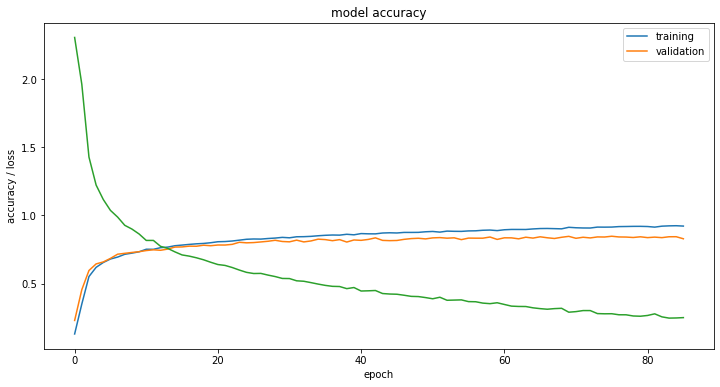

Activation Function relu
Weight Initialization he_normal
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Epoch 00098: early stopping
Model accuracy :  0.8386111
Model Loss : 0.6702732222676278


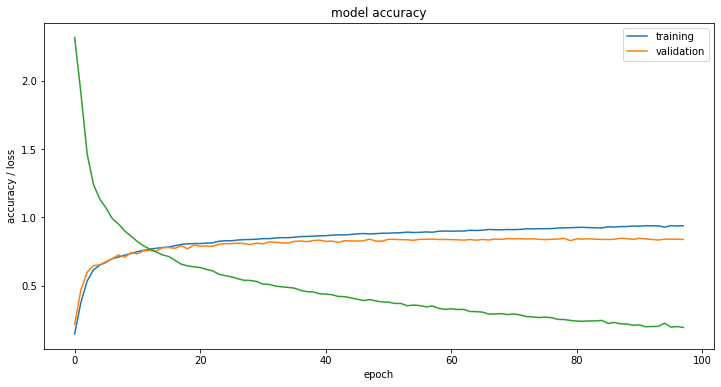

Activation Function selu
Weight Initialization lecun_uniform
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Epoch 00063: early stopping
Model accuracy :  0.8432222
Model Loss : 0.5790449966655837


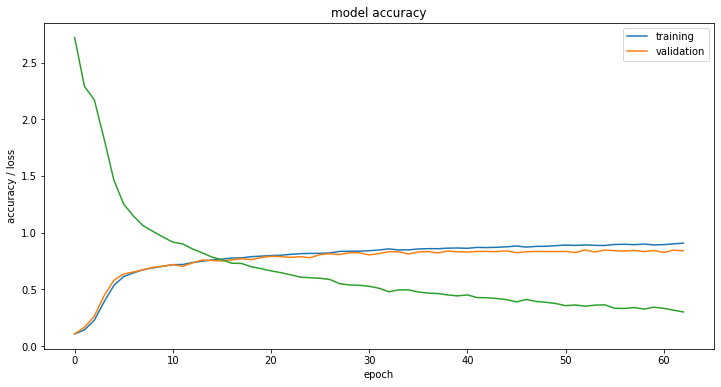

In [0]:
for wt in ["glorot_uniform","he_normal","lecun_uniform"]:
    if wt == "lecun_uniform":
        create_evaluate(activation_fn="selu",weight_init=wt)
    else:
        create_evaluate(weight_init=wt)

In [0]:
#Dont see much of a diference other than small changes in speed of convergence with this set of data and accuracy
#However selu with lecun_initialization converged faster with slightly more accuracy..
#Lets go with relu and default initialization for now

### Lets explore different learning rate models

In [0]:
#Utility function to run various models
def create_evaluate(learn):
    
    #Initialize the base model
    model = Sequential()
    
    #Add to the first Dense layer with neurons and relu as activation function
    model.add(Dense(512,activation="relu",input_shape=(1024,),name="dense_1"))

    #Add to the first Dense layer with  neurons and relu as activation function
    model.add(Dense(512,activation="relu",name="dense_2"))

    #Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
    model.add(Dense(10,activation="softmax",name="dense_f"))
    
    print("Learning Rate",learn)
    
    model.summary()
    
    #Lets define the early stopping with patience as 10
    early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1)
    callback_list = [early_stopping]
    
    opt = Adam(learning_rate=learn)
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, batch_size=512, epochs=100, callbacks=callback_list, validation_split=.15, verbose=False)
    
    loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    print("Model accuracy : ", accuracy)
    print("Model Loss :", loss)
 
    plt.figure(figsize=(12,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()


Learning Rate 0.0001
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.82266665
Model Loss : 0.6255372840828366


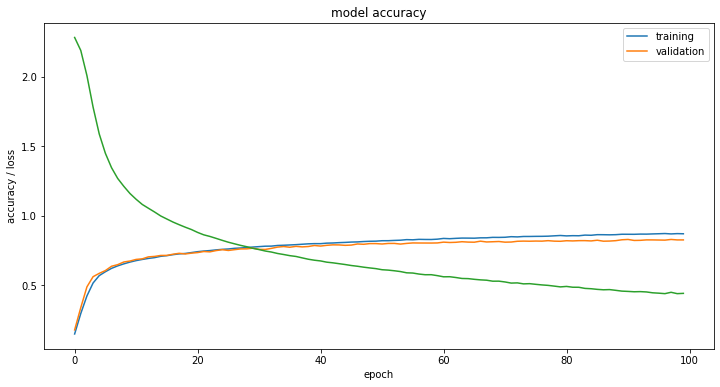

Learning Rate 0.00030000000000000003
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Epoch 00093: early stopping
Model accuracy :  0.8425556
Model Loss : 0.5837361944913864


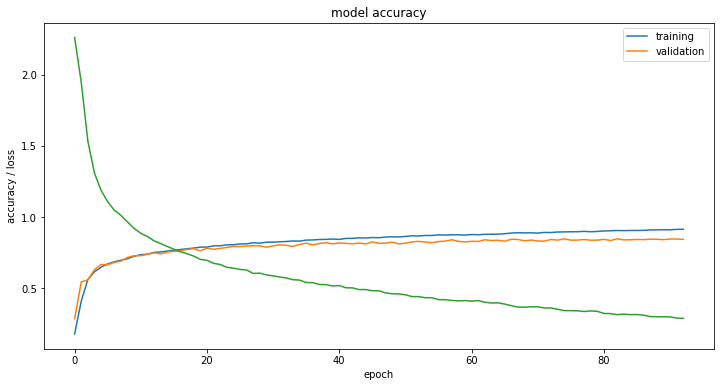

Learning Rate 0.0005000000000000001
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Epoch 00092: early stopping
Model accuracy :  0.84327775
Model Loss : 0.5933014506631428


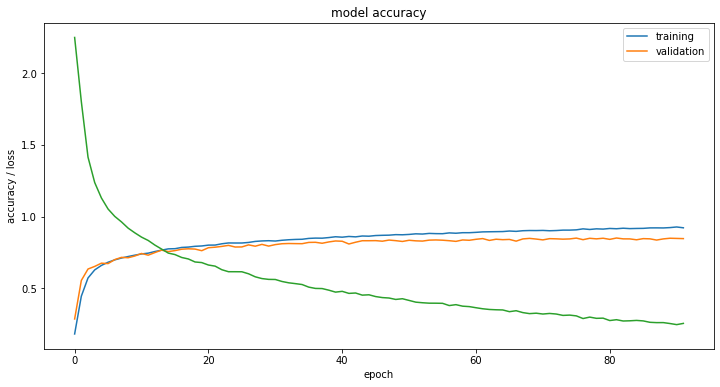

Learning Rate 0.0007000000000000001
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Epoch 00075: early stopping
Model accuracy :  0.8341111
Model Loss : 0.6206332587798437


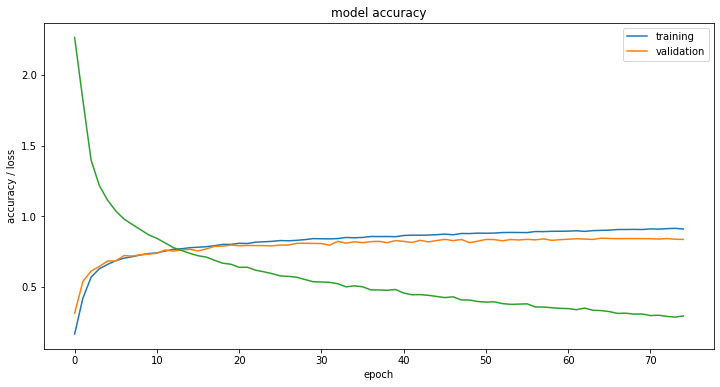

Learning Rate 0.0009000000000000002
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Epoch 00093: early stopping
Model accuracy :  0.8403889
Model Loss : 0.6292682008610831


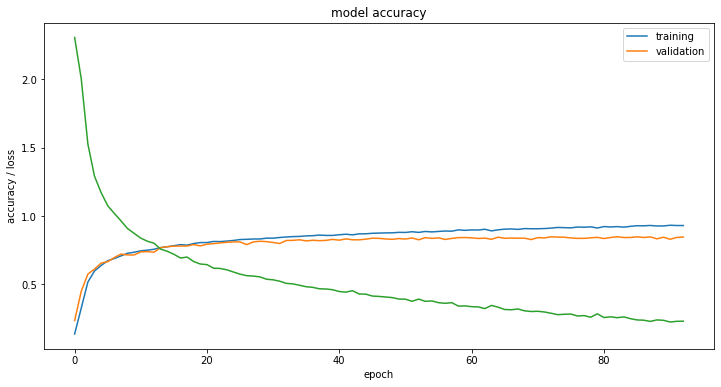

In [0]:
for lr in np.arange(0.0001,0.001,0.0002):
    create_evaluate(learn=lr)
    #print(lr)

In [0]:
#Looks like at least with Adam optimizer learning rate of 0.0001 reduced overfitting..not much change in final accuracy
#Lets try other optimizers and check again

### Optimizers

In [0]:
#Utility function to run various models
def create_evaluate(opt):
    
    #Initialize the base model
    model = Sequential()
    
    #Add to the first Dense layer with neurons and relu as activation function
    model.add(Dense(512,activation="relu",input_shape=(1024,),name="dense_1"))

    #Add to the first Dense layer with  neurons and relu as activation function
    model.add(Dense(512,activation="relu",name="dense_2"))

    #Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
    model.add(Dense(10,activation="softmax",name="dense_f"))
    
    print("Optimizer function used",opt)
    
    model.summary()
    
    #Lets define the early stopping with patience as 10
    early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1)
    callback_list = [early_stopping]
    
     
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, batch_size=512, epochs=100, callbacks=callback_list, validation_split=.15, verbose=False)
    
    loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    print("Model accuracy : ", accuracy)
    print("Model Loss :", loss)
 
    plt.figure(figsize=(12,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()


Optimizer function used sgd
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.69222224
Model Loss : 1.0438086652755738


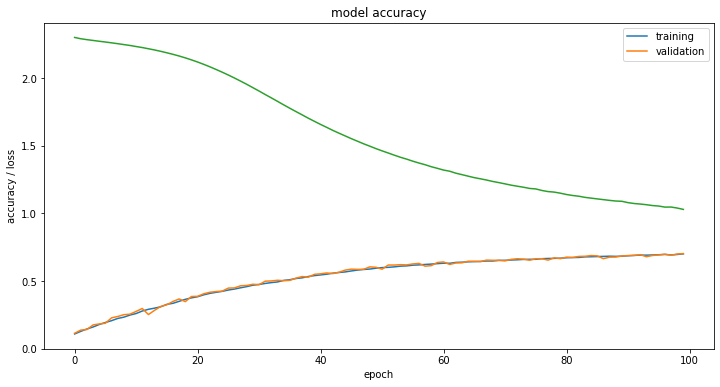

Optimizer function used adam
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Epoch 00081: early stopping
Model accuracy :  0.84327775
Model Loss : 0.6177592870195706


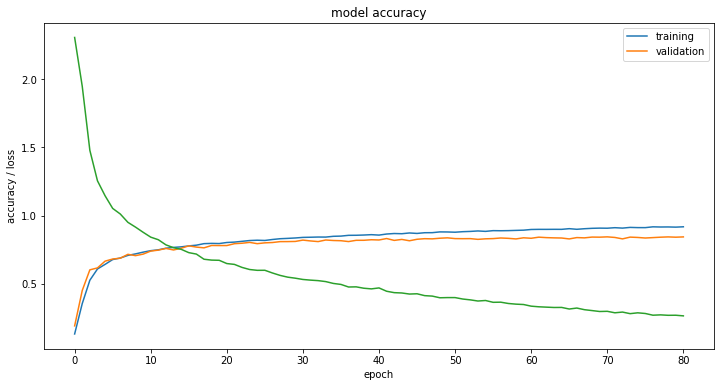

Optimizer function used nadam
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________
Epoch 00069: early stopping
Model accuracy :  0.8352778
Model Loss : 0.611062746975157


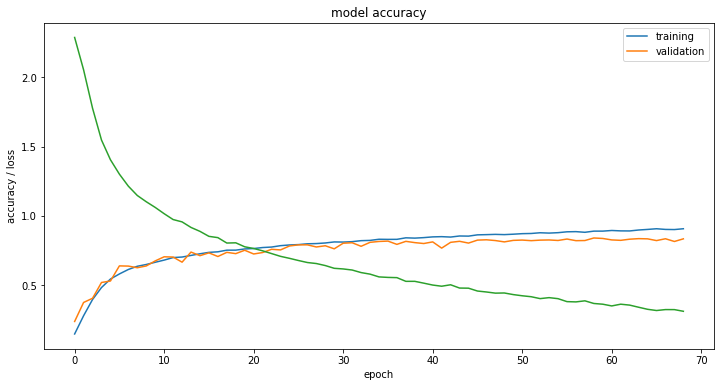

In [0]:
for opt in ["sgd","adam","nadam"]:
    create_evaluate(opt)
    #print(opt)

In [0]:
#Based on the above, we can see the SGD did not perform well (with the batch size of 512), while Adam and NAdam
#performed similarly. We will stick with Adam for now

In [0]:
#We will also add a dropout layer to reduce to the overfitting tendency

#### Final model with tuned parameters (without Batch Norm)

2 Dense layers of 512 neurons each with relu activation function + 1 output layer of 10 neurons with softmax
Batch size 512
Epochs 100 with early stopping
Adam optimizer with learning rate of 0.0001
We will also add an dropout layer to reduce overfitting seen earlier

In [0]:
#Initialize the sequential model
model_f = Sequential()

#Add to the first Dense layer with 512 neurons and relu as activation function
model_f.add(Dense(512,activation="relu",input_shape=(1024,),name="dense_1"))

#Add a dropout b/w Dense layers
model_f.add(Dropout(0.1))

#Add to the first Dense layer with 512 neurons and relu as activation function
model_f.add(Dense(512,activation="relu",name="dense_2"))

#Add a dropout b/w Dense layers
model_f.add(Dropout(0.1))

#Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
model_f.add(Dense(10,activation="softmax",name="dense_f"))

In [0]:
#Check the model summary to see if the model architecture is correct and check parameters
model_f.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 792,586
Trainable params: 792,586
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Compile the model with adam optimizer and categorical_cross entropy as the loss function and metrics as accuracy
opt = Adam(learning_rate=0.0001)

model_f.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Lets define the early stopping with patience as 10
early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1,restore_best_weights=True)
callback_list = [early_stopping]

In [0]:
#Train the model 
BATCH_SIZE = 512
EPOCHS = 100

history_f = model_f.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_split=0.15)

Train on 35700 samples, validate on 6300 samples
Epoch 1/100
35700/35700 [==============================] - 2s 52us/sample - loss: 2.2988 - accuracy: 0.1275 - val_loss: 2.2561 - val_accuracy: 0.2160
Epoch 2/100
35700/35700 [==============================] - 2s 45us/sample - loss: 2.2107 - accuracy: 0.2480 - val_loss: 2.1309 - val_accuracy: 0.3622
Epoch 3/100
35700/35700 [==============================] - 2s 46us/sample - loss: 2.0458 - accuracy: 0.3683 - val_loss: 1.9149 - val_accuracy: 0.4681
Epoch 4/100
35700/35700 [==============================] - 2s 44us/sample - loss: 1.8247 - accuracy: 0.4634 - val_loss: 1.6825 - val_accuracy: 0.5532
Epoch 5/100
35700/35700 [==============================] - 2s 43us/sample - loss: 1.6215 - accuracy: 0.5306 - val_loss: 1.5056 - val_accuracy: 0.5981
Epoch 6/100
35700/35700 [==============================] - 2s 44us/sample - loss: 1.4744 - accuracy: 0.5701 - val_loss: 1.3700 - val_accuracy: 0.6314
Epoch 7/100
35700/35700 [==========================

Epoch 55/100
35700/35700 [==============================] - 2s 43us/sample - loss: 0.6114 - accuracy: 0.8193 - val_loss: 0.6446 - val_accuracy: 0.8110
Epoch 56/100
35700/35700 [==============================] - 2s 42us/sample - loss: 0.6026 - accuracy: 0.8218 - val_loss: 0.6372 - val_accuracy: 0.8154
Epoch 57/100
35700/35700 [==============================] - 2s 43us/sample - loss: 0.5988 - accuracy: 0.8223 - val_loss: 0.6348 - val_accuracy: 0.8143
Epoch 58/100
35700/35700 [==============================] - 2s 44us/sample - loss: 0.5918 - accuracy: 0.8248 - val_loss: 0.6423 - val_accuracy: 0.8121
Epoch 59/100
35700/35700 [==============================] - 2s 43us/sample - loss: 0.5916 - accuracy: 0.8247 - val_loss: 0.6291 - val_accuracy: 0.8154
Epoch 60/100
35700/35700 [==============================] - 2s 43us/sample - loss: 0.5842 - accuracy: 0.8253 - val_loss: 0.6301 - val_accuracy: 0.8108
Epoch 61/100
35700/35700 [==============================] - 2s 43us/sample - loss: 0.5807 - ac

In [0]:
#Get the accuracy from this model
model_f.evaluate(x_test,y_test,verbose=0)

#Accuracy is around 84

[0.5847275678581662, 0.83505553]

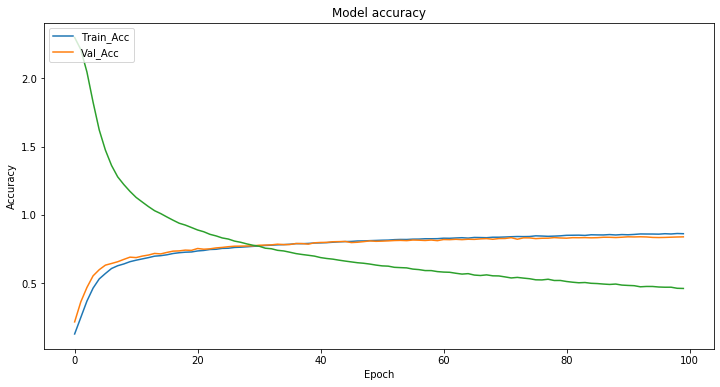

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history_f.history['accuracy'])
plt.plot(history_f.history['val_accuracy'])
plt.plot(history_f.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

#We can see that the train and val accuracy are converging now and flattening

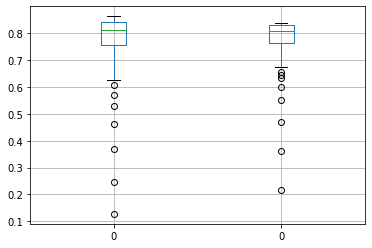

In [0]:
import pandas as pd
#print(history_f.history['val_accuracy'])

#print(history_f.history['accuracy'])

ta = pd.DataFrame(history_f.history['accuracy'])
va = pd.DataFrame(history_f.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

#We can clearly see there is only slight difference in the training and validation accuracy ranges now

### Classification Metrics for the final model

In [0]:
#Get the predictions
y_pred = model_f.predict_classes(x_test)

In [0]:
#Import metrics utilities
from sklearn.metrics import confusion_matrix,classification_report

In [0]:
#Confustion Matrix and classification metrics
print("Confusion Matrix\n")
print(confusion_matrix(y_test_class,y_pred))
print("\nClassification Metrics")
print(classification_report(y_test_class,y_pred))

Confusion Matrix

[[1570   24    7   34   20   15   49   10   37   48]
 [  21 1523   17   60   72   15   32   37   37   14]
 [  22   19 1497   72   28   25   11   57   36   36]
 [  15   22   22 1380   17  143   30   26   41   23]
 [  17   27   22   23 1570   25   52   10   33   33]
 [  15   11    7   84   13 1491   69    8   50   20]
 [  30   19   21   28   34   60 1554    7   70    9]
 [  21   48   44   39   17   22   18 1554   17   28]
 [  18   27   14   53   24   59  101    5 1466   45]
 [  62   31   20   62   25   69   26   16   67 1426]]

Classification Metrics
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1814
           1       0.87      0.83      0.85      1828
           2       0.90      0.83      0.86      1803
           3       0.75      0.80      0.78      1719
           4       0.86      0.87      0.86      1812
           5       0.77      0.84      0.81      1768
           6       0.80      0.85      0.82     

In [0]:
## Looks like 9 was difficult to identify while we can see some more false positives in 3, 5 and 8 than others

### Add BatchNormalization to the above model and assess impacts

In [0]:
#Initialize the sequential model
model_bn = Sequential()

#Add to the first Dense layer with 523 neurons and relu as activation function
model_bn.add(Dense(512,activation="relu",input_shape=(1024,),name="dense_1"))

#Add BatchNorm Layer
model_bn.add(BatchNormalization())

#Add to the first Dense layer with 523 neurons and relu as activation function
model_bn.add(Dense(512,activation="relu",name="dense_2"))

#Add BatchNorm Layer
model_bn.add(BatchNormalization())

#Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
model_bn.add(Dense(10,activation="softmax",name="dense_f"))

In [0]:
#Check the model summary to see if the model architecture is correct and check parameters
model_bn.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_f (Dense)              (None, 10)                5130      
Total params: 796,682
Trainable params: 794,634
Non-trainable params: 2,048
_________________________________________________________________


In [0]:
#Compile the model with adam optimizer and categorical_cross entropy as the loss function and metrics as accuracy
opt = Adam(learning_rate=0.0001)

model_bn.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Lets define the early stopping with patience as 10
early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1,restore_best_weights=True)
callback_list = [early_stopping]

In [0]:
#Train the model 
BATCH_SIZE = 512
EPOCHS = 100

history_bn = model_bn.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_split=0.15)

Train on 35700 samples, validate on 6300 samples
Epoch 1/100
35700/35700 [==============================] - 2s 65us/sample - loss: 2.0181 - accuracy: 0.3260 - val_loss: 2.1987 - val_accuracy: 0.2462
Epoch 2/100
35700/35700 [==============================] - 2s 49us/sample - loss: 1.3687 - accuracy: 0.5805 - val_loss: 2.0080 - val_accuracy: 0.3322
Epoch 3/100
35700/35700 [==============================] - 2s 49us/sample - loss: 1.1065 - accuracy: 0.6727 - val_loss: 1.7233 - val_accuracy: 0.4979
Epoch 4/100
35700/35700 [==============================] - 2s 48us/sample - loss: 0.9644 - accuracy: 0.7190 - val_loss: 1.4762 - val_accuracy: 0.5513
Epoch 5/100
35700/35700 [==============================] - 2s 49us/sample - loss: 0.8715 - accuracy: 0.7457 - val_loss: 1.2172 - val_accuracy: 0.6371
Epoch 6/100
35700/35700 [==============================] - 2s 49us/sample - loss: 0.8008 - accuracy: 0.7685 - val_loss: 1.0222 - val_accuracy: 0.7167
Epoch 7/100
35700/35700 [==========================

In [0]:
#Get the accuracy from this model
model_bn.evaluate(x_test,y_test,verbose=0)

#Accuracy is around 81 but converged quick

[0.6195718876785702, 0.81844443]

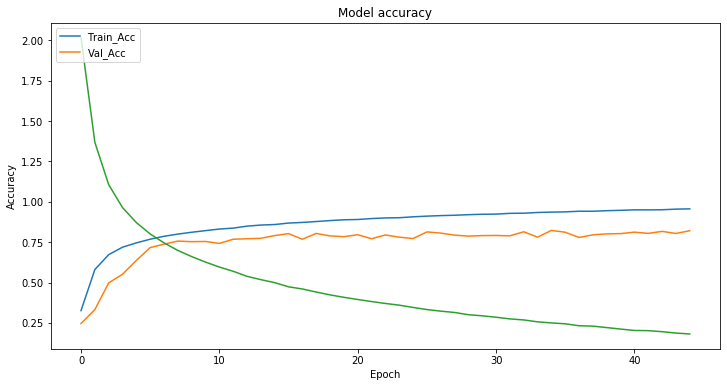

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history_bn.history['accuracy'])
plt.plot(history_bn.history['val_accuracy'])
plt.plot(history_bn.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

#We can see that the train and val accuracy are diverging. Validation accuracy is wavering and stagnant while
#training accuracy is increasing..
#There is some amount of overfitting We will need to check with addtional tuning

In [0]:
#Adding batch normalization increased the overfitting of the model on the previously tuned setup.
#Further tuning by changing the batch size and reducing learning rate increased the accuracy slightly and reduced the
#overfitting little bit. But still this was not the better one without the normalization model
#One reason could be that this is still a very shallow network
#Lets try adding few more Dense layers and see it makes a difference

#### Additional Layers added

In [0]:
#Initialize the sequential model
model_dnn = Sequential()

#Add to the first Dense layer with 512 neurons and relu as activation function
model_dnn.add(Dense(512,activation="relu",input_shape=(1024,),name="dense_1"))

#Add BatchNorm Layer
model_dnn.add(BatchNormalization())

#Add to the first Dense layer with 512 neurons and relu as activation function
model_dnn.add(Dense(512,activation="relu",name="dense_2"))

#Add BatchNorm Layer
model_dnn.add(BatchNormalization())

#Add to the first Dense layer with 512 neurons and relu as activation function
model_dnn.add(Dense(512,activation="relu",name="dense_3"))

#Add BatchNorm Layer
model_dnn.add(BatchNormalization())

#Add to the first Dense layer with 512 neurons and relu as activation function
model_dnn.add(Dense(512,activation="relu",name="dense_4"))

#Add BatchNorm Layer
model_dnn.add(BatchNormalization())

#Add to the first Dense layer with 512 neurons and relu as activation function
model_dnn.add(Dense(512,activation="relu",name="dense_5"))

#Add BatchNorm Layer
model_dnn.add(BatchNormalization())

#Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
model_dnn.add(Dense(10,activation="softmax",name="dense_f"))

In [0]:
#Check the model summary to see if the model architecture is correct and check parameters
model_dnn.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dense_4 (Dense)              (None, 512)             

In [0]:
#Compile the model with adam optimizer and categorical_cross entropy as the loss function and metrics as accuracy
opt = Adam(learning_rate=0.0001)

model_dnn.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Lets define the early stopping with patience as 10
early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1,restore_best_weights=True)
callback_list = [early_stopping]

In [0]:
#Train the model 
BATCH_SIZE = 512
EPOCHS = 100

history_dnn = model_dnn.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_split=0.15)

Train on 35700 samples, validate on 6300 samples
Epoch 1/100
35700/35700 [==============================] - 5s 146us/sample - loss: 1.9788 - accuracy: 0.3493 - val_loss: 2.2520 - val_accuracy: 0.1981
Epoch 2/100
35700/35700 [==============================] - 4s 107us/sample - loss: 1.1680 - accuracy: 0.6248 - val_loss: 2.0185 - val_accuracy: 0.3051
Epoch 3/100
35700/35700 [==============================] - 4s 123us/sample - loss: 0.8943 - accuracy: 0.7148 - val_loss: 1.6420 - val_accuracy: 0.4602
Epoch 4/100
35700/35700 [==============================] - 5s 136us/sample - loss: 0.7358 - accuracy: 0.7702 - val_loss: 1.2674 - val_accuracy: 0.5840
Epoch 5/100
35700/35700 [==============================] - 4s 123us/sample - loss: 0.6264 - accuracy: 0.8072 - val_loss: 0.9664 - val_accuracy: 0.6959
Epoch 6/100
35700/35700 [==============================] - 5s 127us/sample - loss: 0.5450 - accuracy: 0.8320 - val_loss: 0.9406 - val_accuracy: 0.6959
Epoch 7/100
35700/35700 [====================

In [0]:
#Get the accuracy from this model
model_dnn.evaluate(x_test,y_test,verbose=0)

#Accuracy is around 78

[0.945195620059967, 0.7801667]

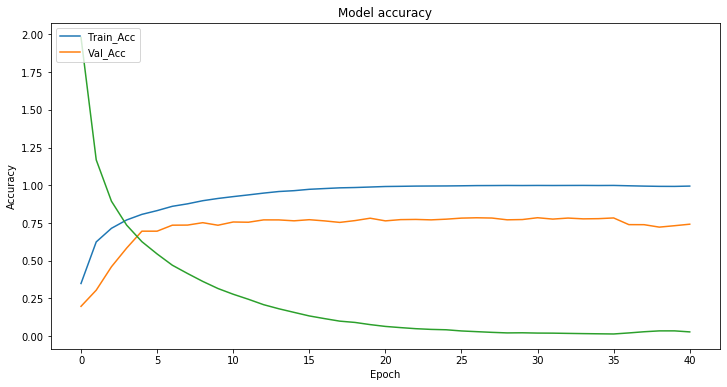

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history_dnn.history['accuracy'])
plt.plot(history_dnn.history['val_accuracy'])
plt.plot(history_dnn.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

In [0]:
#We continue to see not much improvement and more wavering of validation accuracy indicating overfitting
#Lets try implementing batch normalization before the activation function and see it makes a difference
#Using the original model with 2 layers

#### Moving batchnorm before activation function

In [0]:
#Initialize the sequential model
model_bn1 = Sequential()

#Add to the first Dense layer with 523 neurons and relu as activation function
model_bn1.add(Dense(512,input_shape=(1024,),name="dense_1"))

#Add BatchNorm Layer
model_bn1.add(BatchNormalization())

#Add the activation back
model_bn1.add(Activation("relu"))

#Add to the first Dense layer with 523 neurons and relu as activation function
model_bn1.add(Dense(512,name="dense_2"))

#Add BatchNorm Layer
model_bn1.add(BatchNormalization())


#Add the activation back
model_bn1.add(Activation("relu"))

#Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
model_bn1.add(Dense(10,activation="softmax",name="dense_f"))

In [0]:
#Check the model summary to see if the model architecture is correct and check parameters
model_bn1.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_f (Dense)              (None, 10)              

In [0]:
#Compile the model with adam optimizer and categorical_cross entropy as the loss function and metrics as accuracy
opt = Adam(learning_rate=0.0001)

model_bn1.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Train the model 
BATCH_SIZE = 512
EPOCHS = 100

history_bn1 = model_bn1.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_split=0.15)

Train on 35700 samples, validate on 6300 samples
Epoch 1/100
35700/35700 [==============================] - 3s 72us/sample - loss: 1.9775 - accuracy: 0.3421 - val_loss: 2.1790 - val_accuracy: 0.3184
Epoch 2/100
35700/35700 [==============================] - 2s 47us/sample - loss: 1.3516 - accuracy: 0.6082 - val_loss: 1.9221 - val_accuracy: 0.4844
Epoch 3/100
35700/35700 [==============================] - 2s 47us/sample - loss: 1.0775 - accuracy: 0.6956 - val_loss: 1.6116 - val_accuracy: 0.6108
Epoch 4/100
35700/35700 [==============================] - 2s 58us/sample - loss: 0.9276 - accuracy: 0.7365 - val_loss: 1.3455 - val_accuracy: 0.6403
Epoch 5/100
35700/35700 [==============================] - 2s 48us/sample - loss: 0.8273 - accuracy: 0.7663 - val_loss: 1.1486 - val_accuracy: 0.6754
Epoch 6/100
35700/35700 [==============================] - 2s 52us/sample - loss: 0.7524 - accuracy: 0.7879 - val_loss: 0.9941 - val_accuracy: 0.7071
Epoch 7/100
35700/35700 [==========================

In [0]:
#Get the accuracy from this model
model_bn1.evaluate(x_test,y_test,verbose=0)

#Accuracy is around 79..convergence is fast

[0.6780069543785519, 0.7977222]

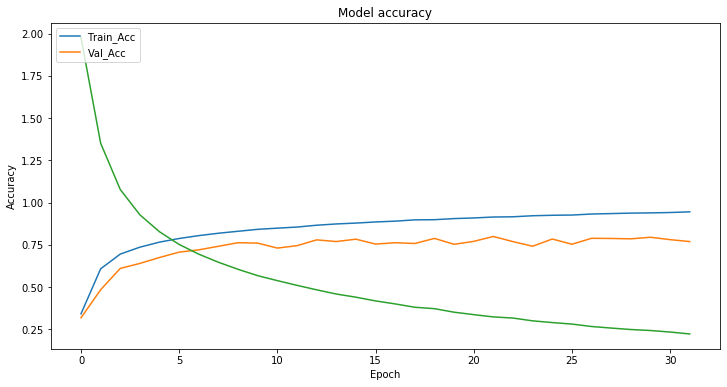

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history_bn1.history['accuracy'])
plt.plot(history_bn1.history['val_accuracy'])
plt.plot(history_bn1.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

In [0]:
#BatchNorm with this shallow network did not improve the accuracy or generalization much.
#Maybe for deeper networks it could improve the accuracy and reduce overfitting

### Lets evaluate this model with various batch sizes

In [0]:
#Utility function to run multiple models
#utility function to evaluate the performance

def create_evaluate_batchnorm(batch_size=BATCH_SIZE, epochs=EPOCHS):
    
    #Initialize the base model
    model = Sequential()
    
    #Add to the first Dense layer with 523 neurons and relu as activation function
    model.add(Dense(512,input_shape=(1024,),name="dense_1"))

    #Add BatchNorm Layer
    model.add(BatchNormalization())

    #Add the activation back
    model.add(Activation("relu"))

    #Add to the first Dense layer with 523 neurons and relu as activation function
    model.add(Dense(512,name="dense_2"))

    #Add BatchNorm Layer
    model.add(BatchNormalization())


    #Add the activation back
    model.add(Activation("relu"))
    
    #Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
    model.add(Dense(10,activation="softmax",name="dense_f"))
    
    print("Batch size",batch_size)
    model.summary()
    
    opt = Adam(learning_rate=0.0001)
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.15, verbose=False)
    
    loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    print("Model accuracy : ", accuracy)
    print("Model Loss :", loss)
 
    plt.figure(figsize=(12,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()


Batch size 256
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_f (Dense)              (None, 10

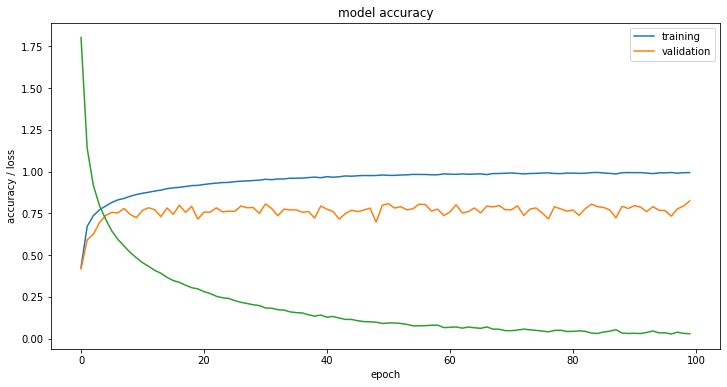

Batch size 512
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_f (Dense)              (None, 10

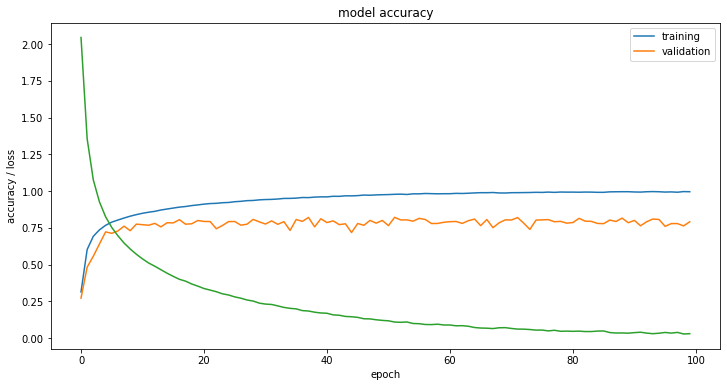

Batch size 1024
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_f (Dense)              (None, 1

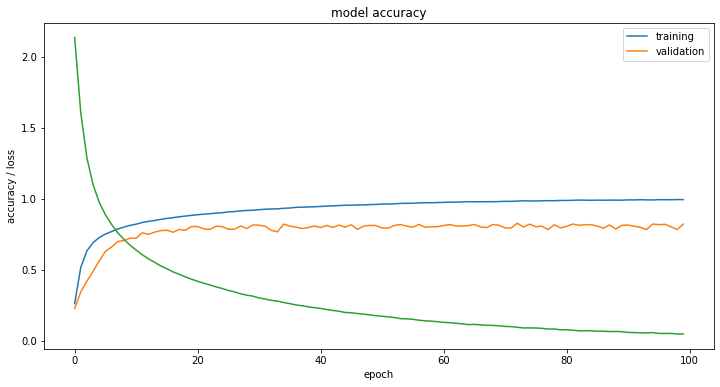

Batch size 2048
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_f (Dense)              (None, 1

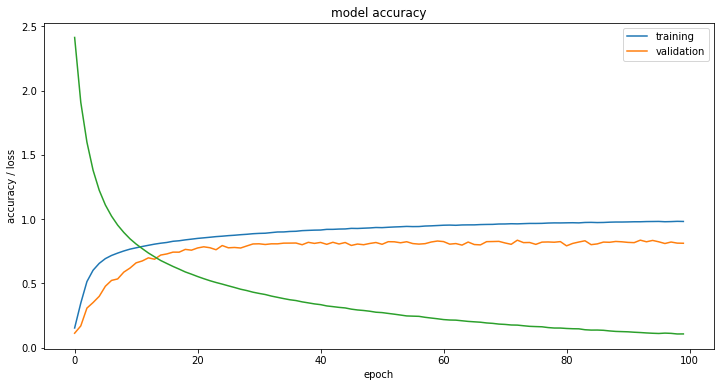

Batch size 3072
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_18 (Batc (None, 512)               2048      
_________________________________________________________________
activation_11 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_f (Dense)              (None, 1

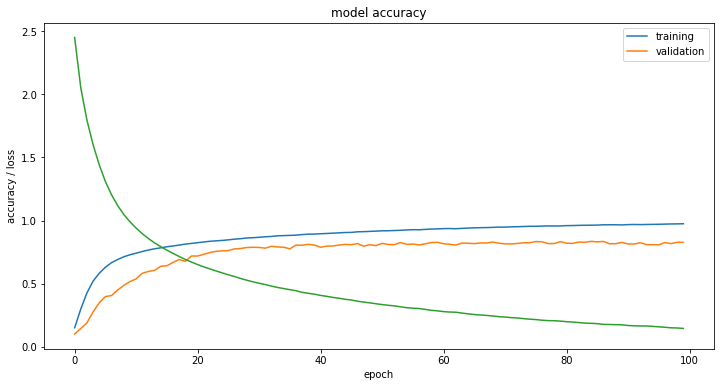

In [0]:
for bsize in [256,512,1024,2048,3072]:
    create_evaluate_batchnorm(batch_size=bsize,epochs=100)

In [0]:
#Looks like batch size of 3072 with learning rate of 0.0001 gives better accuracy..
#the overfitting is still there though

#### Final model with batch normalization
Batch size of 3072, removing bias from dense layer since BN already introduces this.

In [0]:
#Initialize the sequential model
model_bnf = Sequential()

#Add to the first Dense layer with 523 neurons and relu as activation function
model_bnf.add(Dense(512,input_shape=(1024,),name="dense_1",use_bias=False))

#Add BatchNorm Layer
model_bnf.add(BatchNormalization())

#Add the activation back
model_bnf.add(Activation("relu"))

#Add to the first Dense layer with 523 neurons and relu as activation function
model_bnf.add(Dense(512,name="dense_2",use_bias=False))

#Add BatchNorm Layer
model_bnf.add(BatchNormalization())


#Add the activation back
model_bnf.add(Activation("relu"))

#Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
model_bnf.add(Dense(10,activation="softmax",name="dense_f"))

In [0]:
#Check the model summary to see if the model architecture is correct and check parameters
model_bnf.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524288    
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262144    
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_f (Dense)              (None, 10)              

In [0]:
#Compile the model with adam optimizer and categorical_cross entropy as the loss function and metrics as accuracy
opt = Adam(learning_rate=0.0001)

model_bnf.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Lets define the early stopping with patience as 10
early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1,restore_best_weights=True)
callback_list = [early_stopping]

In [0]:
#Train the model 
BATCH_SIZE = 3072
EPOCHS = 100

history_bnf = model_bnf.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_split=0.15)

Train on 35700 samples, validate on 6300 samples
Epoch 1/100
35700/35700 [==============================] - 2s 68us/sample - loss: 2.5193 - accuracy: 0.1409 - val_loss: 2.3009 - val_accuracy: 0.1175
Epoch 2/100
35700/35700 [==============================] - 2s 47us/sample - loss: 2.0990 - accuracy: 0.2869 - val_loss: 2.2693 - val_accuracy: 0.1933
Epoch 3/100
35700/35700 [==============================] - 2s 50us/sample - loss: 1.8299 - accuracy: 0.4170 - val_loss: 2.2349 - val_accuracy: 0.2686
Epoch 4/100
35700/35700 [==============================] - 2s 49us/sample - loss: 1.6157 - accuracy: 0.5148 - val_loss: 2.1900 - val_accuracy: 0.3281
Epoch 5/100
35700/35700 [==============================] - 2s 48us/sample - loss: 1.4417 - accuracy: 0.5833 - val_loss: 2.1470 - val_accuracy: 0.3668
Epoch 6/100
35700/35700 [==============================] - 2s 48us/sample - loss: 1.3052 - accuracy: 0.6315 - val_loss: 2.1048 - val_accuracy: 0.3814
Epoch 7/100
35700/35700 [==========================

Epoch 55/100
35700/35700 [==============================] - 2s 46us/sample - loss: 0.3217 - accuracy: 0.9213 - val_loss: 0.6188 - val_accuracy: 0.8162
Epoch 56/100
35700/35700 [==============================] - 2s 46us/sample - loss: 0.3167 - accuracy: 0.9231 - val_loss: 0.6115 - val_accuracy: 0.8152
Epoch 57/100
35700/35700 [==============================] - 2s 46us/sample - loss: 0.3101 - accuracy: 0.9259 - val_loss: 0.6135 - val_accuracy: 0.8156
Epoch 58/100
35700/35700 [==============================] - 2s 46us/sample - loss: 0.3045 - accuracy: 0.9273 - val_loss: 0.6126 - val_accuracy: 0.8163
Epoch 59/100
35700/35700 [==============================] - 2s 46us/sample - loss: 0.3008 - accuracy: 0.9273 - val_loss: 0.5895 - val_accuracy: 0.8213
Epoch 00059: early stopping


In [0]:
#Get the accuracy from this model
model_bnf.evaluate(x_test,y_test,verbose=0)

#Accuracy is around 82

[0.6173565421104431, 0.82044446]

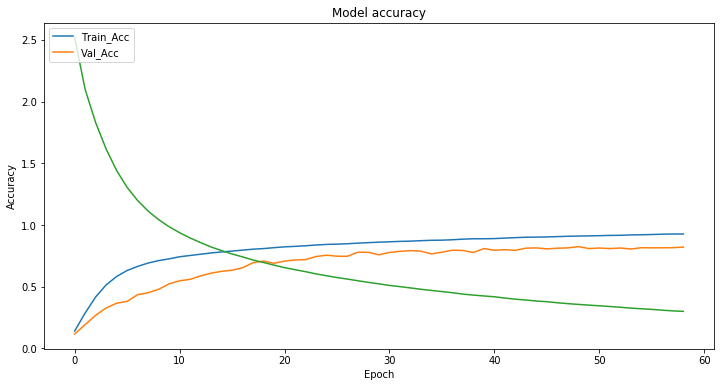

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history_bnf.history['accuracy'])
plt.plot(history_bnf.history['val_accuracy'])
plt.plot(history_bnf.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

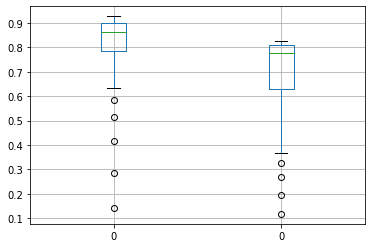

In [0]:
#print(history_bnf.history['val_accuracy'])

#print(history_bnf.history['accuracy'])

ta = pd.DataFrame(history_bnf.history['accuracy'])
va = pd.DataFrame(history_bnf.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

#We can clearly see the dradtic difference in the training and validation accuracy ranges clearly indicating overfitting

In [0]:
##Lets see if we can add the dropout as well to reduce this

In [0]:
#Initialize the sequential model
model_bndrop = Sequential()

#Add to the first Dense layer with 523 neurons and relu as activation function
model_bndrop.add(Dense(512,input_shape=(1024,),name="dense_1",use_bias=False))

#Add BatchNorm Layer
model_bndrop.add(BatchNormalization())

#Add the activation back
model_bndrop.add(Activation("relu"))

#Add dropout
model_bndrop.add(Dropout(0.2))

#Add to the first Dense layer with 523 neurons and relu as activation function
model_bndrop.add(Dense(512,name="dense_2",use_bias=False))

#Add BatchNorm Layer
model_bndrop.add(BatchNormalization())

#Add the activation back
model_bndrop.add(Activation("relu"))

#Add dropout
model_bndrop.add(Dropout(0.2))

#Add final output Dense layer with 10 neurons and softmax as activation function..this is the output layer
model_bndrop.add(Dense(10,activation="softmax",name="dense_f"))

In [0]:
#Check the model summary to see if the model architecture is correct and check parameters
model_bndrop.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524288    
_________________________________________________________________
batch_normalization_24 (Batc (None, 512)               2048      
_________________________________________________________________
activation_17 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262144    
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
activation_18 (Activation)   (None, 512)             

In [0]:
#Compile the model with adam optimizer and categorical_cross entropy as the loss function and metrics as accuracy
opt = Adam(learning_rate=0.0001)

model_bndrop.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Lets define the early stopping with patience as 10
early_stopping = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1,restore_best_weights=True)
callback_list = [early_stopping]

In [0]:
#Train the model 
BATCH_SIZE = 3072
EPOCHS = 100

history_bndrop = model_bndrop.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_split=0.15)

Train on 35700 samples, validate on 6300 samples
Epoch 1/100
35700/35700 [==============================] - 3s 77us/sample - loss: 2.5093 - accuracy: 0.1363 - val_loss: 2.2951 - val_accuracy: 0.1063
Epoch 2/100
35700/35700 [==============================] - 2s 57us/sample - loss: 2.2278 - accuracy: 0.2167 - val_loss: 2.2688 - val_accuracy: 0.1492
Epoch 3/100
35700/35700 [==============================] - 2s 57us/sample - loss: 2.0346 - accuracy: 0.2961 - val_loss: 2.2309 - val_accuracy: 0.2538
Epoch 4/100
35700/35700 [==============================] - 2s 57us/sample - loss: 1.8603 - accuracy: 0.3711 - val_loss: 2.1904 - val_accuracy: 0.3108
Epoch 5/100
35700/35700 [==============================] - 2s 57us/sample - loss: 1.7032 - accuracy: 0.4360 - val_loss: 2.1509 - val_accuracy: 0.3400
Epoch 6/100
35700/35700 [==============================] - 2s 58us/sample - loss: 1.5718 - accuracy: 0.4901 - val_loss: 2.0966 - val_accuracy: 0.4144
Epoch 7/100
35700/35700 [==========================

Epoch 55/100
35700/35700 [==============================] - 2s 56us/sample - loss: 0.5386 - accuracy: 0.8369 - val_loss: 0.5835 - val_accuracy: 0.8279
Epoch 56/100
35700/35700 [==============================] - 2s 61us/sample - loss: 0.5323 - accuracy: 0.8394 - val_loss: 0.5981 - val_accuracy: 0.8244
Epoch 57/100
35700/35700 [==============================] - 2s 58us/sample - loss: 0.5291 - accuracy: 0.8373 - val_loss: 0.5813 - val_accuracy: 0.8316
Epoch 58/100
35700/35700 [==============================] - 2s 57us/sample - loss: 0.5246 - accuracy: 0.8422 - val_loss: 0.5751 - val_accuracy: 0.8313
Epoch 59/100
35700/35700 [==============================] - 2s 56us/sample - loss: 0.5145 - accuracy: 0.8427 - val_loss: 0.5701 - val_accuracy: 0.8310
Epoch 60/100
35700/35700 [==============================] - 2s 57us/sample - loss: 0.5117 - accuracy: 0.8452 - val_loss: 0.5691 - val_accuracy: 0.8344
Epoch 61/100
35700/35700 [==============================] - 2s 57us/sample - loss: 0.5105 - ac

In [0]:
#Get the accuracy from this model
model_bndrop.evaluate(x_test,y_test,verbose=0)

#Accuracy is around 84

[0.5136163182258606, 0.8487778]

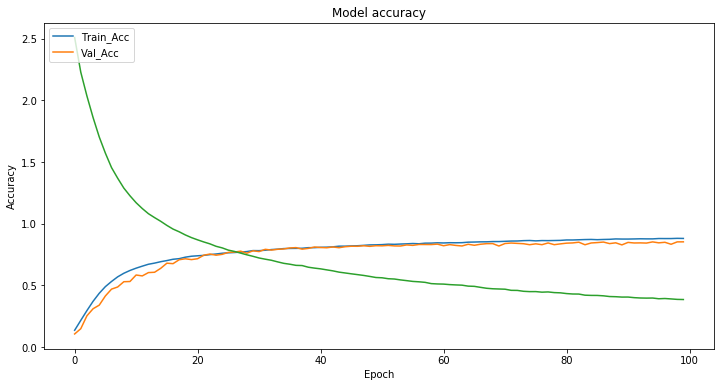

In [0]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history_bndrop.history['accuracy'])
plt.plot(history_bndrop.history['val_accuracy'])
plt.plot(history_bndrop.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc',"Val_Acc"], loc='upper left')

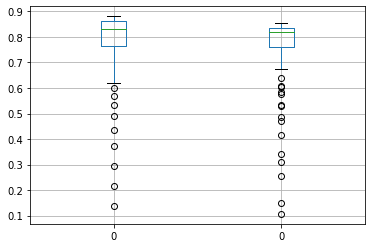

In [0]:
#print(history_bnf.history['val_accuracy'])

#print(history_bnf.history['accuracy'])

ta = pd.DataFrame(history_bndrop.history['accuracy'])
va = pd.DataFrame(history_bndrop.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

#The overfitting has reduced now and accuracy increased to about 84%

#### Classfication Metrics

In [0]:
#Get the predictions
y_pred = model_bndrop.predict_classes(x_test)

In [0]:
#Confustion Matrix and classification metrics
print("Confusion Matrix\n")
print(confusion_matrix(y_test_class,y_pred))
print("\nClassification Metrics")
print(classification_report(y_test_class,y_pred))

Confusion Matrix

[[1564   31   29   27   20    3   18   14   30   78]
 [  14 1586   35   43   58    5    7   33   26   21]
 [  10   29 1608   35   22    9    2   28   16   44]
 [  10   41   46 1420   16   79    9   20   54   24]
 [  17   47   39   24 1600    9   11    9   17   39]
 [   9   14   22  107   19 1456   36   11   39   55]
 [  45   28   27   33   53   54 1455    8   93   36]
 [   9   84   69   33   13    6    6 1536   16   36]
 [  24   40   31   62   29   22   36   10 1493   65]
 [  33   30   25   47   22   32    4   14   37 1560]]

Classification Metrics
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1814
           1       0.82      0.87      0.84      1828
           2       0.83      0.89      0.86      1803
           3       0.78      0.83      0.80      1719
           4       0.86      0.88      0.87      1812
           5       0.87      0.82      0.85      1768
           6       0.92      0.79      0.85     